PART 1: HOMELESSNESS IN SCHOOLS

unfiltered


,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022
...,...,...,...,...,...,...,...,...,...,...,...,...
2014,9030022,The Woodstock Academy District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,23,0.8478,NaN,NaN,42.0,0.8943,June 2022,07/22/2022
2015,9030022,The Woodstock Academy District,Race/Ethnicity,All other races,86,0.9393,91.0,0.9650,126.0,0.9739,June 2022,07/22/2022
2016,9030022,The Woodstock Academy District,Race/Ethnicity,White,901,0.9288,899.0,0.9587,925.0,0.9437,June 2022,07/22/2022
2017,9030022,The Woodstock Academy District,High Needs,Students Without High Needs,949,0.9318,953.0,0.9617,1009.0,0.9516,June 2022,07/22/2022


rows extracted


,District name,Student group,2021-2022 student count - year to date
0,Connecticut,All Students,500285
1,Connecticut,Students Experiencing Homelessness,1814
2,Connecticut,Students With Disabilities,78417
3,Connecticut,Free Meal Eligible,168984
4,Connecticut,Reduced Price Meal Eligible,29905
...,...,...,...
2014,The Woodstock Academy District,Free/Reduced Price Meal Eligible,23
2015,The Woodstock Academy District,All other races,86
2016,The Woodstock Academy District,White,901
2017,The Woodstock Academy District,Students Without High Needs,949


non-city districts removed


,District name,Student group,2021-2022 student count - year to date
13,Andover School District,All Students,161
14,Andover School District,Students With Disabilities,23
15,Andover School District,Free/Reduced Price Meal Eligible,30
16,Andover School District,White,134
17,Andover School District,Students Without High Needs,113
...,...,...,...
2014,The Woodstock Academy District,Free/Reduced Price Meal Eligible,23
2015,The Woodstock Academy District,All other races,86
2016,The Woodstock Academy District,White,901
2017,The Woodstock Academy District,Students Without High Needs,949


all students data


,District name,Student group,2021-2022 student count - year to date
13,Andover School District,All Students,161
19,Ansonia School District,All Students,2139
31,Ashford School District,All Students,343
40,Avon School District,All Students,3057
52,Barkhamsted School District,All Students,199
...,...,...,...
1966,Unified School District #1,All Students,140
1972,Unified School District #2,All Students,78
1990,Norwich Free Academy District,All Students,2068
2002,The Gilbert School District,All Students,421


homeless students data


,District name,Student group,2021-2022 student count - year to date
132,Bridgeport School District,Students Experiencing Homelessness,123
145,Bristol School District,Students Experiencing Homelessness,65
284,Danbury School District,Students Experiencing Homelessness,25
570,Hartford School District,Students Experiencing Homelessness,107
706,Middletown School District,Students Experiencing Homelessness,35
767,New Britain School District,Students Experiencing Homelessness,81
808,New Haven School District,Students Experiencing Homelessness,234
833,New London School District,Students Experiencing Homelessness,184
914,Norwalk School District,Students Experiencing Homelessness,33
1195,Stamford School District,Students Experiencing Homelessness,57


sort on district name


,District name,2021-2022 student count - year to date
0,Achievement First Bridgeport Academy District,1064.0
1,Achievement First Hartford Academy District,1089.0
2,Amistad Academy District,1093.0
3,Andover School District,161.0
4,Ansonia School District,2139.0
...,...,...
193,Windsor Locks School District,1428.0
194,Windsor School District,3219.0
195,Wolcott School District,2121.0
196,Woodbridge School District,834.0


,District name,2021-2022 student count - year to date
0,Bridgeport School District,123.0
1,Bristol School District,65.0
2,Danbury School District,25.0
3,Hartford School District,107.0
4,Middletown School District,35.0
5,New Britain School District,81.0
6,New Haven School District,234.0
7,New London School District,184.0
8,Norwalk School District,33.0
9,Stamford School District,57.0


dataframes merged


,District name,2021-2022 student count - year to date ALL STUDENTS,2021-2022 student count - year to date HOMELESS STUDENTS
0,Bridgeport School District,18482.0,123.0
1,Bristol School District,7439.0,65.0
2,Danbury School District,11783.0,25.0
3,Hartford School District,16371.0,107.0
4,Middletown School District,4346.0,35.0
5,New Britain School District,9299.0,81.0
6,New Haven School District,18028.0,234.0
7,New London School District,3055.0,184.0
8,Norwalk School District,12356.0,33.0
9,Stamford School District,15986.0,57.0


percentage calculated


,District name,2021-2022 student count - year to date ALL STUDENTS,2021-2022 student count - year to date HOMELESS STUDENTS,Proportion Homeless
0,Bridgeport School District,18482.0,123.0,0.665512
1,Bristol School District,7439.0,65.0,0.873773
2,Danbury School District,11783.0,25.0,0.212170
3,Hartford School District,16371.0,107.0,0.653595
4,Middletown School District,4346.0,35.0,0.805338
5,New Britain School District,9299.0,81.0,0.871061
6,New Haven School District,18028.0,234.0,1.297981
7,New London School District,3055.0,184.0,6.022913
8,Norwalk School District,12356.0,33.0,0.267077
9,Stamford School District,15986.0,57.0,0.356562


<Figure size 1200x600 with 0 Axes>

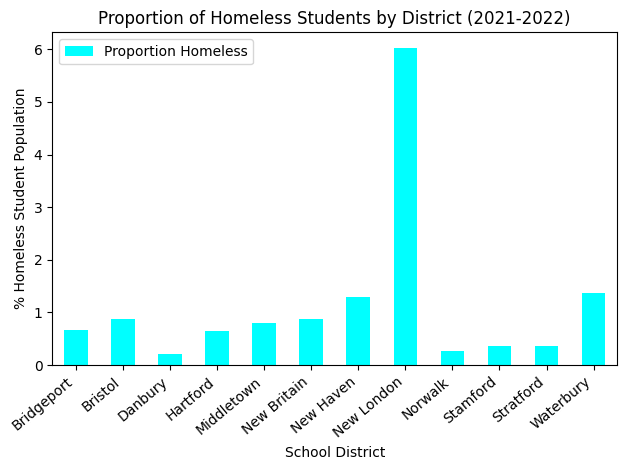

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

########
## SELECTING THE DATASET
#####
data_dir = 'datasets'
df = pd.read_csv(f'{data_dir}/School_Attendance_by_Student_Group_and_District__2021-2022.csv')
print("unfiltered")
display(df)

########
## EXTRACT DESIRED COLUMNS
#####
attendance_data = df[['District name', 'Student group', '2021-2022 student count - year to date']]
print("rows extracted")
display(attendance_data)

########
## FILTER OUT NON-CITY DISTRICTS
#####
attendance_data = attendance_data[attendance_data['District name'] != 'Connecticut']
attendance_data = attendance_data[attendance_data['District name'] != 'Connecticut Technical Education and Career System']
attendance_data = attendance_data[attendance_data['District name'] != 'Capitol Region Education Council']
print("non-city districts removed")
display(attendance_data)

########
## EXTRACT DESIRED ROWS
#####
all_students_data = attendance_data[attendance_data['Student group'] == 'All Students']
homeless_students_data = attendance_data[attendance_data['Student group'] == 'Students Experiencing Homelessness']
print("all students data")
display(all_students_data)
print("homeless students data")
display(homeless_students_data)

########
## GROUP STUDENT COUNTS BY DISTRICTS
#####
all_students_attendance = all_students_data.groupby('District name')['2021-2022 student count - year to date'].mean().reset_index()
homeless_students_attendance = homeless_students_data.groupby('District name')['2021-2022 student count - year to date'].mean().reset_index()
print("sort on district name")
display(all_students_attendance)
display(homeless_students_attendance)

########
## MERGE DATAFRAMES ON DISTRICT NAME
#####
comparison_df = pd.merge(all_students_attendance, homeless_students_attendance, on='District name', suffixes=(' ALL STUDENTS', ' HOMELESS STUDENTS'))
print("dataframes merged")
display(comparison_df)

########
## CALCULATE PERCENTAGE OF HOMELESS STUDENTS
#####
comparison_df['Proportion Homeless'] = comparison_df['2021-2022 student count - year to date HOMELESS STUDENTS'] / comparison_df['2021-2022 student count - year to date ALL STUDENTS'] * 100
print("percentage calculated")
display(comparison_df)
for i, s in enumerate(comparison_df['District name']):
    comparison_df['District name'].values[i] = s.replace(" School District", "")

########
## CREATE BAR GRAPH
#####
plt.figure(figsize=(12, 6))
comparison_df.plot(x='District name', y='Proportion Homeless', kind='bar', color='cyan')
plt.xlabel('School District')
plt.ylabel('% Homeless Student Population')
plt.title('Proportion of Homeless Students by District (2021-2022)')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

PART 2: ACCIDENTAL DRUG RELATED DEATHS

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,2012-05-29,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,2012-06-27,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,2014-03-24,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,2014-12-31,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,2016-01-16,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10649,2022-08-15,Date of death,60.0,Male,White,NaN,SOUTHINGTON,HARTFORD,CT,SOUTHINGTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SOUTHINGTON, CT\n(41.600220000000036, -72.8781...","SOUTHINGTON, CT\n(41.600220000000036, -72.8781...","CT\n(41.57350273000003, -72.73830590799997)"
10650,2022-01-30,Date of death,65.0,Male,White,NaN,HARTFORD,HARTFORD,CT,HARTFORD,...,NaN,Y,NaN,y,Buprenorphine,Y,Buprenorphine,"HARTFORD, CT\n(41.76376000000005, -72.67397999...","HARTFORD, CT\n(41.76376000000005, -72.67397999...","CT\n(41.57350273000003, -72.73830590799997)"
10651,2022-09-17,Date of death,41.0,Male,Black or African American,NaN,HARTFORD,HARTFORD,CT,HARTFORD,...,Y,NaN,NaN,NaN,NaN,Y,NaN,"HARTFORD, CT\n(41.76376000000005, -72.67397999...","HARTFORD, CT\n(41.76376000000005, -72.67397999...","CT\n(41.57350273000003, -72.73830590799997)"
10652,2022-12-20,Date of death,59.0,Male,White,NaN,CHESHIRE,NEW HAVEN,CT,CHESHIRE,...,Y,NaN,NaN,NaN,NaN,Y,NaN,"CHESHIRE, CT\n(41.511690000000044, -72.8991099...","CHESHIRE, CT\n(41.511690000000044, -72.8991099...","CT\n(41.57350273000003, -72.73830590799997)"


,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
22,2021-10-15,Date of death,54.0,Male,White,NaN,NaN,NaN,NaN,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"CT\n(41.575155, -72.738288)",NaN,"Hartford, CT\n(41.765775, -72.673356)"
26,2021-09-07,Date of death,46.0,Male,White,NaN,NaN,NaN,NaN,MERIDEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","MERIDEN, CT\n(41.537589, -72.8011)","Meriden, CT\n(41.537589, -72.8011)"
27,2021-10-09,Date of death,50.0,Male,White,NaN,ATHOL,WORCESTER,MA,ATHOL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hartford, CT\n(41.765775, -72.673356)"
29,2021-09-11,Date of death,35.0,Male,White,NaN,IVORYTON,MIDDLESEX,CT,CLINTON,...,Y,NaN,NaN,NaN,NaN,Y,Bupren,"IVORYTON, CT\n(41.348301, -72.439697)","CLINTON, CT\n(41.278677, -72.528067)","Westbrook, CT\n(41.283357, -72.441654)"
54,2021-09-15,Date of death,38.0,Male,White,Other Spanish/Hispanic/Latino,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)","NEW HAVEN, CT\n(41.308252, -72.924161)","New Haven, CT\n(41.308252, -72.924161)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,2022-05-07,Date of death,36.0,Male,White,NaN,WEST HAVEN,NEW HAVEN,CT,WEST HAVEN,...,Y,NaN,NaN,NaN,NaN,Y,NaN,"WEST HAVEN, CT\n(41.27228000000008, -72.949979...","WEST HAVEN, CT\n(41.27228000000008, -72.949979...","CT\n(41.57350273000003, -72.73830590799997)"
10644,2022-04-28,Date of death,37.0,Female,White,NaN,NIANTIC,NEW LONDON,CT,NIANTIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NIANTIC, CT\n(41.33266, -72.19794)","NIANTIC, CT\n(41.33266, -72.19794)","CT\n(41.57350273000003, -72.73830590799997)"
10646,2022-04-04,Date of death,31.0,Male,White,Spanish/Hispanic/Latino,WATERBURY,NEW HAVEN,CT,WATERBURY,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"WATERBURY, CT\n(41.55490000000003, -73.0464699...","WATERBURY, CT\n(41.55490000000003, -73.0464699...","CT\n(41.57350273000003, -72.73830590799997)"
10648,2022-03-04,Date of death,77.0,Male,White,NaN,BROOKLYN,KINGS,NY,WATERBURY,...,NaN,Y,NaN,NaN,NaN,Y,NaN,"BROOKLYN, CT\n(41.78716000000003, -71.94963999...","WATERBURY, CT\n(41.55490000000003, -73.0464699...","CT\n(41.57350273000003, -72.73830590799997)"


,Residence City,Death City
22,NaN,HARTFORD
26,NaN,MERIDEN
27,ATHOL,HARTFORD
29,IVORYTON,WESTBROOK
54,NEW HAVEN,NEW HAVEN
...,...,...
10643,WEST HAVEN,NaN
10644,NIANTIC,NaN
10646,WATERBURY,NaN
10648,BROOKLYN,NaN


,Geography,Best Population Estimate
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,name,population
4,Connecticut,3626205
...,...,...
169,Windsor town,29424
170,Wolcott town,16232
171,Woodbridge town,9073
172,Woodbury town,9762


,City Names,Deaths per Capita
19,Bridgeport,0.538615
21,Bristol,0.395172
38,Danbury,0.208824
68,Hartford,0.748589
87,Middletown,0.318039
93,New Britain,0.499851
97,New Haven,0.709622
98,New London,0.833786
107,Norwalk,0.187181
139,Stamford,0.08159


,City Names,Deaths per Capita
19,Bridgeport,0.302971
21,Bristol,0.181121
38,Danbury,0.127615
68,Hartford,0.411313
87,Middletown,0.169621
93,New Britain,0.175623
97,New Haven,0.425773
98,New London,0.362516
107,Norwalk,0.055053
139,Stamford,0.051921


<Figure size 1200x600 with 0 Axes>

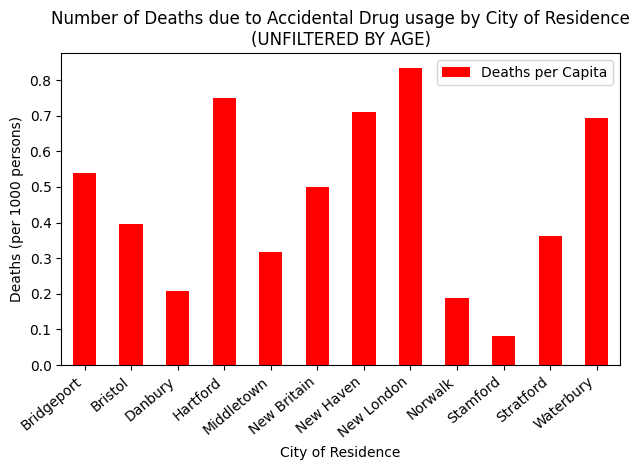

<Figure size 1200x600 with 0 Axes>

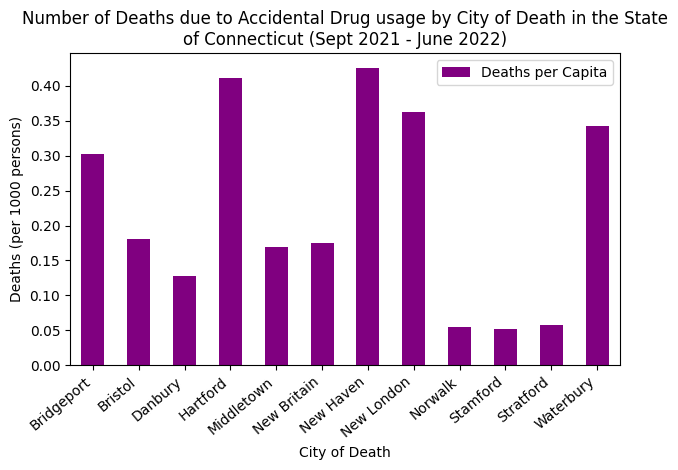

In [39]:
import textwrap

########
## SELECTING THE DATASET
#####
data_dir = 'datasets'
df_drugs = pd.read_csv(f'{data_dir}/Accidental_Drug_Related_Deaths_2012-2022.csv')
df_population = pd.read_excel(f'{data_dir}/Connecticut_DemographicsByCity_sample.xlsx')

########
## CONVERT TO DATETIME FORMAT
#####
df_drugs['Date'] = pd.to_datetime(df_drugs['Date'])
display(df_drugs)

########
## CREATING MASK FOR DATES BETWEEN SEPTEMBER 1st 2021 and JUNE 6th 2022 FOR THE SCHOOL YEAR
## AS WELL AS PEOPLE OVER THE AGE OF 40, DEEMED UNRELATED
#####
date_mask = (df_drugs['Date'] >= '2021-09-01') & (df_drugs['Date'] <= '2022-06-30')
#age_mask = (df_drugs['Age'] < 40) & (df_drugs['Age'] > 25)

########
## MASKING THE DATA FRAME
#####
filtered_drug_data = df_drugs[date_mask]
#filtered_drug_data = date_filtered[age_mask]
display(filtered_drug_data)

########
## EXTRACT DESIRED COLUMNS
#####
death_data = filtered_drug_data[['Residence City', 'Death City']]
population_data = df_population[['Geography', 'Best Population Estimate']]
display(death_data)
display(population_data)

########
## SETTING UP MASK FOR CITIES OF INTEREST
#####
cities_included = ["Bridgeport", "Bristol", "Danbury", "Hartford", "Middletown", "New Britain", "New Haven", "New London", "Norwalk", "Stamford", "Stratford", "Waterbury"]
death_cities_included = [s.upper() for s in cities_included]
pop_cities_included = [s + " town" for s in cities_included]

########
## CREATING THE MASK FOR CITIES OF INTEREST
#####
death_city_mask = death_data['Death City'].isin(death_cities_included)
res_city_mask = death_data['Residence City'].isin(death_cities_included)
population_city_mask = population_data['Geography'].isin(pop_cities_included)

########
## APPLYING THE MASK FOR CITIES OF INTEREST
#####
deaths_by_res_city = death_data[res_city_mask]
deaths_by_death_city = death_data[death_city_mask]
population_by_city = population_data[population_city_mask]

########
## REMOVING "TOWN" FROM CITY NAMES
#####
for i, s in enumerate(population_by_city['Geography']):
    population_by_city['Geography'].values[i] = s.replace(" town", "")

########
## COUNTING NUMBER OF DEATHS PER CITY
#####
res_city_death_counts = deaths_by_res_city['Residence City'].value_counts()
death_city_death_counts = deaths_by_death_city['Death City'].value_counts()

########
## CREATING DATA FRAMES TO STORE THE CITY NAMES AND DEATHS PER CAPITA
## WHICH WILL BE USED FOR GRAPHING
#####
population_by_res_city = pd.DataFrame({
    "City Names": population_by_city.sort_index()['Geography'],
    "Deaths per Capita": population_by_city.sort_index()['Best Population Estimate']
})

population_by_death_city = pd.DataFrame({
    "City Names": population_by_city.sort_index()['Geography'],
    "Deaths per Capita": population_by_city.sort_index()['Best Population Estimate']
})

########
## SORTING BY CITY NAMES
#####
res_city_death_counts = res_city_death_counts.sort_index()
death_city_death_counts = death_city_death_counts.sort_index()

########
## CALCULATING THE DEATHS PER CAPITA
#####
for i, val in enumerate(res_city_death_counts.values):
    population_by_res_city['Deaths per Capita'].values[i] = val / population_by_res_city['Deaths per Capita'].values[i] * 1000

for i, val in enumerate(death_city_death_counts.values):
    population_by_death_city['Deaths per Capita'].values[i] = val / population_by_death_city['Deaths per Capita'].values[i] * 1000

display(population_by_res_city)
display(population_by_death_city)

########
## BAR GRAPH FOR DEATHS BY CITY OF RESIDENCE
#####
plt.figure(figsize=(12, 6))
population_by_res_city.plot(x='City Names', y='Deaths per Capita', kind='bar', color='red')
plt.xlabel('City of Residence')
plt.ylabel('Deaths (per 1000 persons)')
plt.title(textwrap.fill('Number of Deaths due to Accidental Drug usage by City of Residence (UNFILTERED BY AGE)', width=75))
plt.xticks(rotation=40, ha='right')
plt.tight_layout()

########
## BAR GRAPH FOR DEATHS BY CITY OF DEATH
#####
plt.figure(figsize=(12, 6))
population_by_death_city.plot(x='City Names', y='Deaths per Capita', kind='bar', color='purple')
plt.xlabel('City of Death')
plt.ylabel('Deaths (per 1000 persons)')
plt.title(textwrap.fill('Number of Deaths due to Accidental Drug usage by City of Death in the State of Connecticut (Sept 2021 - June 2022)', width=75))
plt.xticks(rotation=40, ha='right')
plt.tight_layout()

plt.show()

PART 3: PREDICTIVE MODEL

<Figure size 1200x600 with 0 Axes>

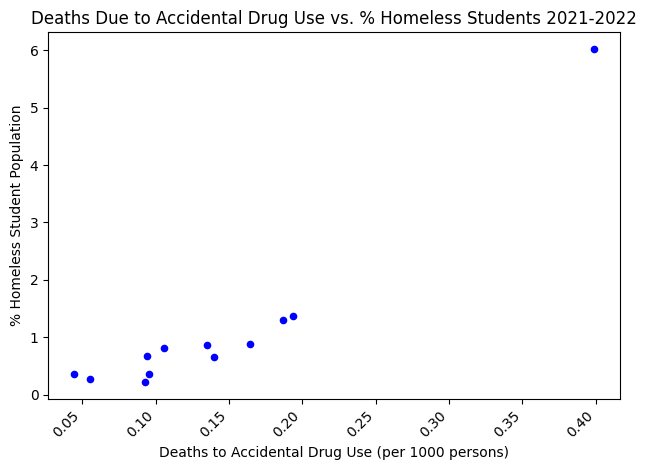

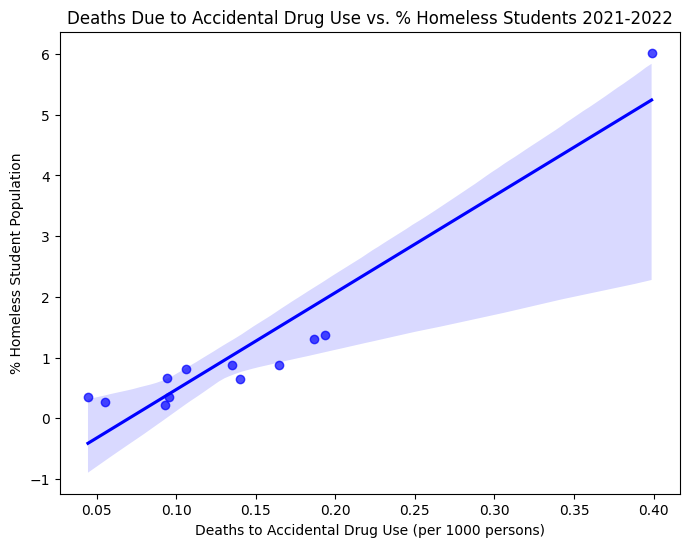

Line Equation: y = 15.97x + -1.12
R-value: 0.95
P-value: 0.000003
Standard Error: 1.74
R-squared: 0.89


<Figure size 1200x600 with 0 Axes>

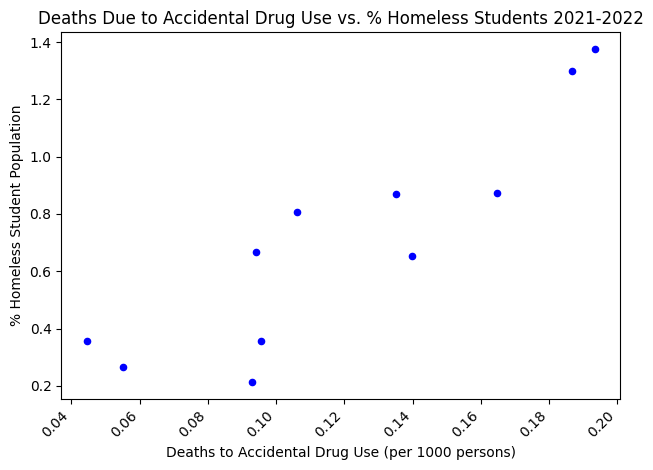

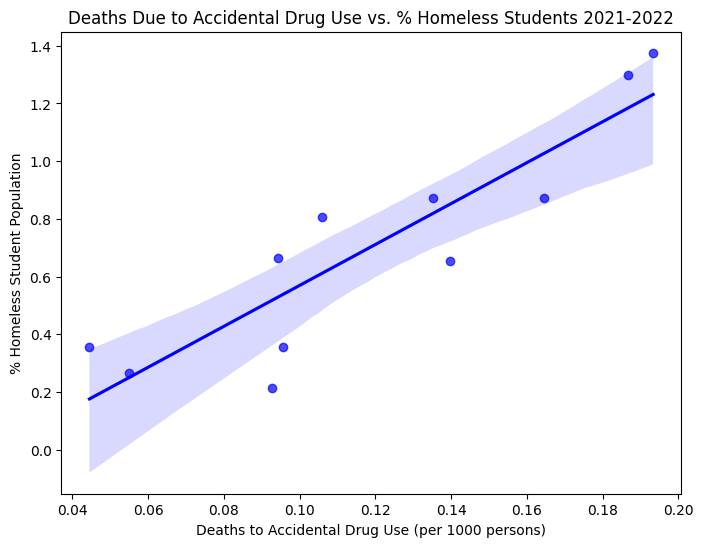

Line Equation: y = 7.09x + -0.14
R-value: 0.89
P-value: 0.000219
Standard Error: 1.19
R-squared: 0.80


In [30]:
import seaborn as sns
from scipy.stats import linregress

########
## FUNCTION TO PRINT THE RELEVANT STATISTICS OF A DATAFRAME
## USING LINREGRESS OBJECT FROM SCIPY.STATS AS AN INPUT
#####
def printStats(result):
    slope = result.slope
    intercept = result.intercept
    r_value = result.rvalue
    p_value = result.pvalue
    std_err = result.stderr
    r_squared = r_value ** 2
    
    # Display the statistical values
    print(f"Line Equation: y = {slope:.2f}x + {intercept:.2f}")
    
    print(f"R-value: {r_value:.2f}")
    print(f"P-value: {p_value:.6f}")

    print(f"Standard Error: {std_err:.2f}")
    print(f"R-squared: {r_squared:.2f}")

########
## EXTRACT DESIRED COLUMNS FROM PART 1
#####
student_df = comparison_df[['District name', 'Proportion Homeless']]
for i, s in enumerate(student_df['District name']):
    student_df['District name'].values[i] = s.replace(" School District", "")

########
## USE DEATHS BY CITY OF RESIDENCE FROM PART 2
#####
drugs_df = population_by_res_city

########
## MERGE DATAFRAMES ON CITY NAME
#####
df_combined = pd.merge(student_df, drugs_df, left_on='District name', right_on='City Names', how='inner')
df_combined = df_combined.drop('City Names', axis=1)

df_combined['Proportion Homeless'] = pd.to_numeric(df_combined['Proportion Homeless'], errors='coerce')
df_combined['Deaths per Capita'] = pd.to_numeric(df_combined['Deaths per Capita'], errors='coerce')

##
## SCATTERPLOT (NO REGRESSION)
##

plt.figure(figsize=(12, 6))
df_combined.plot(x='Deaths per Capita', y='Proportion Homeless', kind='scatter', color='blue')
plt.xlabel('Deaths to Accidental Drug Use (per 1000 persons)')
plt.ylabel('% Homeless Student Population')
plt.title('Deaths Due to Accidental Drug Use vs. % Homeless Students 2021-2022')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##
## SCATTERPLOT (WITH REGRESSION)
##

plt.figure(figsize=(8, 6))
sns.regplot(x='Deaths per Capita', y='Proportion Homeless', data=df_combined, scatter_kws={'alpha':0.7}, color='blue')
plt.xlabel('Deaths to Accidental Drug Use (per 1000 persons)')
plt.ylabel('% Homeless Student Population')
plt.title('Deaths Due to Accidental Drug Use vs. % Homeless Students 2021-2022')
plt.show()

########
## PRINT STATS USING LINREGRESS
#####
printStats(linregress(df_combined['Deaths per Capita'], df_combined['Proportion Homeless']))

########
## REMOVING THE OUTLIER
#####
df_combined_no_london = df_combined
df_combined_no_london = df_combined_no_london[df_combined_no_london['District name'] != 'New London']

##
## SCATTERPLOT (NO REGRESSION) WITH OUTLIER REMOVED
##

plt.figure(figsize=(12, 6))
df_combined_no_london.plot(x='Deaths per Capita', y='Proportion Homeless', kind='scatter', color='blue')
plt.xlabel('Deaths to Accidental Drug Use (per 1000 persons)')
plt.ylabel('% Homeless Student Population')
plt.title('Deaths Due to Accidental Drug Use vs. % Homeless Students 2021-2022')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##
## SCATTERPLOT (WITH REGRESSION) WITH OUTLIER REMOVED
##

plt.figure(figsize=(8, 6))
sns.regplot(x='Deaths per Capita', y='Proportion Homeless', data=df_combined_no_london, scatter_kws={'alpha':0.7}, color='blue')
plt.xlabel('Deaths to Accidental Drug Use (per 1000 persons)')
plt.ylabel('% Homeless Student Population')
plt.title('Deaths Due to Accidental Drug Use vs. % Homeless Students 2021-2022')
plt.show()

########
## PRINT STATS USING LINREGRESS
#####
printStats(linregress(df_combined_no_london['Deaths per Capita'], df_combined_no_london['Proportion Homeless']))

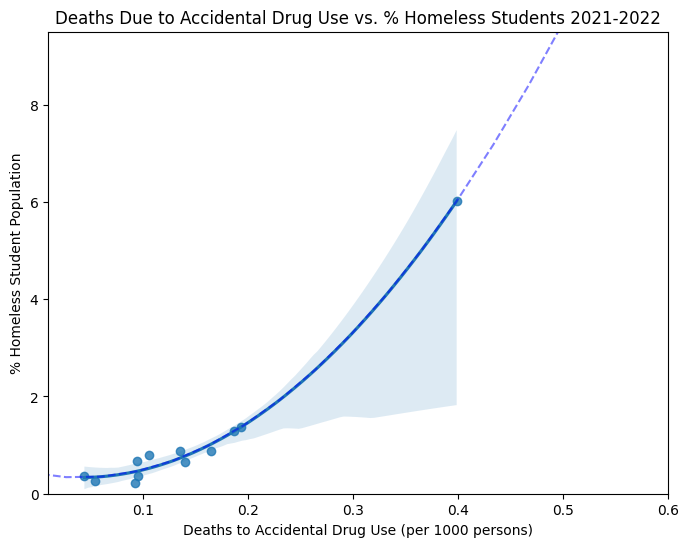

Quadratic Coefficients: [44.29673161 -3.59060023  0.40560998]
R-squared: 0.99


In [17]:
import numpy as np
import sklearn.metrics as sk

########
## CALCULATE R-SQUARED VALUE
#####

def calcQuadStats(x, y):    
    coefficients = np.polyfit(x, y, 2)
    y_pred = np.polyval(coefficients, x)

    r_squared = sk.r2_score(y, y_pred)

    print(f'Quadratic Coefficients: {coefficients}')
    print(f'R-squared: {r_squared:.2f}')


########
## OVERLAYING A DOTTED GRAPH TO INDICATE THE PREDICTED VALUES
#####
def graphPrettification(x, y):
    coefficients = np.polyfit(x, y, 2)

    extended_x = np.linspace(min(x) -1, max(x) + 2, 100)
    extended_y = np.polyval(coefficients, extended_x)

    plt.plot(extended_x, extended_y, linestyle='dashed', color='blue', alpha=0.5, label='Extended Regression')


########
## QUADRATIC REGRESSION
#####

plt.figure(figsize=(8, 6))
sns.regplot(x='Deaths per Capita', y='Proportion Homeless', data=df_combined, order=2)
graphPrettification(df_combined['Deaths per Capita'], df_combined['Proportion Homeless'])
plt.xlabel('Deaths to Accidental Drug Use (per 1000 persons)')
plt.ylabel('% Homeless Student Population')
plt.title('Deaths Due to Accidental Drug Use vs. % Homeless Students 2021-2022')
plt.ylim(0, 9.5)
plt.xlim(0.01, 0.6)
plt.show()

calcQuadStats(df_combined['Deaths per Capita'], df_combined['Proportion Homeless'])